In [152]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [153]:

# file path to raw data
file_path = 'heart+disease/Data/raw.csv'

# define column names
column_names = ['age', 'sex', 'chest_pain_type','resting_blood_pres','cholesteral','fasting_blood_sugar','resting_ecg','max_heart_rate','exercise_induced_angina', 'oldpeak', 'slope','no_of_vessels_colored','thal', 'class','remarks']

# Read data into dataframe
data = pd.read_csv(file_path, header= None, names=column_names)

# save DataFrame to CSV file
data.to_csv("heart+disease/Data/heart_disease.csv", index = False)

In [154]:
# Load the dataset
df = pd.read_csv('heart+disease/Data/heart_disease.csv')

Gather information about data

In [155]:
# display first few rows of df
df.head()

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


In [156]:
df.shape

(303, 15)

In [157]:
# look at the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    float64
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pres       303 non-null    float64
 4   cholesteral              303 non-null    float64
 5   fasting_blood_sugar      303 non-null    object 
 6   resting_ecg              303 non-null    object 
 7   max_heart_rate           303 non-null    float64
 8   exercise_induced_angina  303 non-null    object 
 9   oldpeak                  303 non-null    float64
 10  slope                    303 non-null    object 
 11  no_of_vessels_colored    303 non-null    object 
 12  thal                     303 non-null    object 
 13  class                    303 non-null    object 
 14  remarks                  3

In [158]:
# describe the dataset
df.describe()

,age,resting_blood_pres,cholesteral,max_heart_rate,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [159]:
# Display missing values
print(df.isnull().sum())

age                        0
sex                        0
chest_pain_type            0
resting_blood_pres         0
cholesteral                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
oldpeak                    0
slope                      0
no_of_vessels_colored      0
thal                       0
class                      0
remarks                    0
dtype: int64


Data Preprocessing: Converting categorical values into numerical codes

In [160]:
# if female 0, male = 1
df['sex'] = df['sex'].apply(lambda x: 0 if x.lower().startswith('f') else 1)
df.head()

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,1,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,1,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,1,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,1,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,0,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


In [161]:
# angina = 1, abnang = 2, notang = 3, asympt = 4
df['chest_pain_type'] = df['chest_pain_type'].apply(lambda x:1 if x.lower().startswith('angina') else 2 if x.lower().startswith('abnang') else 3 if x.lower().startswith('notang')else 4)
df.head(20)

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,1,1,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
5,56.0,1,2,120.0,236.0,fal,norm,178.0,fal,0.8,up,0.0,norm,buff,H
6,62.0,0,4,140.0,268.0,fal,hyp,160.0,fal,3.6,down,2.0,norm,sick,S3
7,57.0,0,4,120.0,354.0,fal,norm,163.0,true,0.6,up,0.0,norm,buff,H
8,63.0,1,4,130.0,254.0,fal,hyp,147.0,fal,1.4,flat,1.0,rev,sick,S2
9,53.0,1,4,140.0,203.0,true,hyp,155.0,true,3.1,down,0.0,rev,sick,S1


In [162]:
# True: 1, False = 0
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].apply(lambda x:1 if x.lower().startswith('t') else 0)
df.head(20)

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,1,1,145.0,233.0,1,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,0,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,0,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,0,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,0,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
5,56.0,1,2,120.0,236.0,0,norm,178.0,fal,0.8,up,0.0,norm,buff,H
6,62.0,0,4,140.0,268.0,0,hyp,160.0,fal,3.6,down,2.0,norm,sick,S3
7,57.0,0,4,120.0,354.0,0,norm,163.0,true,0.6,up,0.0,norm,buff,H
8,63.0,1,4,130.0,254.0,0,hyp,147.0,fal,1.4,flat,1.0,rev,sick,S2
9,53.0,1,4,140.0,203.0,1,hyp,155.0,true,3.1,down,0.0,rev,sick,S1


In [163]:
# norm : 1, abn : 2, hyper : 3
df['resting_ecg'] = df['resting_ecg'].apply(lambda x:1 if x.lower().startswith('n') else 2 if x.lower().startswith('a') else 3 )
df.head(20)

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,1,1,145.0,233.0,1,3,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,0,3,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,0,3,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,0,1,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,0,3,172.0,fal,1.4,up,0.0,norm,buff,H
5,56.0,1,2,120.0,236.0,0,1,178.0,fal,0.8,up,0.0,norm,buff,H
6,62.0,0,4,140.0,268.0,0,3,160.0,fal,3.6,down,2.0,norm,sick,S3
7,57.0,0,4,120.0,354.0,0,1,163.0,true,0.6,up,0.0,norm,buff,H
8,63.0,1,4,130.0,254.0,0,3,147.0,fal,1.4,flat,1.0,rev,sick,S2
9,53.0,1,4,140.0,203.0,1,3,155.0,true,3.1,down,0.0,rev,sick,S1


In [164]:
# True: 1, False = 0
df['exercise_induced_angina'] = df['exercise_induced_angina'].apply(lambda x:1 if x.lower().startswith('t') else 0)
df.head(20)

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,1,1,145.0,233.0,1,3,150.0,0,2.3,down,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,0,3,108.0,1,1.5,flat,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,0,3,129.0,1,2.6,flat,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,0,1,187.0,0,3.5,down,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,0,3,172.0,0,1.4,up,0.0,norm,buff,H
5,56.0,1,2,120.0,236.0,0,1,178.0,0,0.8,up,0.0,norm,buff,H
6,62.0,0,4,140.0,268.0,0,3,160.0,0,3.6,down,2.0,norm,sick,S3
7,57.0,0,4,120.0,354.0,0,1,163.0,1,0.6,up,0.0,norm,buff,H
8,63.0,1,4,130.0,254.0,0,3,147.0,0,1.4,flat,1.0,rev,sick,S2
9,53.0,1,4,140.0,203.0,1,3,155.0,1,3.1,down,0.0,rev,sick,S1


In [165]:
# up : 1, flat : 2, down : 3
df['slope'] = df['slope'].apply(lambda x:1 if x.lower().startswith('u') else 2 if x.lower().startswith('f') else 3 )
df.head(20)

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,0,1,187.0,0,3.5,3,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,0,3,172.0,0,1.4,1,0.0,norm,buff,H
5,56.0,1,2,120.0,236.0,0,1,178.0,0,0.8,1,0.0,norm,buff,H
6,62.0,0,4,140.0,268.0,0,3,160.0,0,3.6,3,2.0,norm,sick,S3
7,57.0,0,4,120.0,354.0,0,1,163.0,1,0.6,1,0.0,norm,buff,H
8,63.0,1,4,130.0,254.0,0,3,147.0,0,1.4,2,1.0,rev,sick,S2
9,53.0,1,4,140.0,203.0,1,3,155.0,1,3.1,3,0.0,rev,sick,S1


In [166]:
# norm : 1, fixed : 2, rever : 3
df['thal'] = df['thal'].apply(lambda x:1 if x.lower().startswith('n') else 2 if x.lower().startswith('f') else 3 )
df.head(20)

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,2,buff,H
1,67.0,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,1,sick,S2
2,67.0,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,3,sick,S1
3,37.0,1,3,130.0,250.0,0,1,187.0,0,3.5,3,0.0,1,buff,H
4,41.0,0,2,130.0,204.0,0,3,172.0,0,1.4,1,0.0,1,buff,H
5,56.0,1,2,120.0,236.0,0,1,178.0,0,0.8,1,0.0,1,buff,H
6,62.0,0,4,140.0,268.0,0,3,160.0,0,3.6,3,2.0,1,sick,S3
7,57.0,0,4,120.0,354.0,0,1,163.0,1,0.6,1,0.0,1,buff,H
8,63.0,1,4,130.0,254.0,0,3,147.0,0,1.4,2,1.0,3,sick,S2
9,53.0,1,4,140.0,203.0,1,3,155.0,1,3.1,3,0.0,3,sick,S1


In [167]:
# buff(healthy): 1, sick(heart_disease) = 0
df['class'] = df['class'].apply(lambda x:1 if x.lower().startswith('b') else 0)
df.head(20)

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,remarks
0,63.0,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,2,1,H
1,67.0,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,1,0,S2
2,67.0,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,3,0,S1
3,37.0,1,3,130.0,250.0,0,1,187.0,0,3.5,3,0.0,1,1,H
4,41.0,0,2,130.0,204.0,0,3,172.0,0,1.4,1,0.0,1,1,H
5,56.0,1,2,120.0,236.0,0,1,178.0,0,0.8,1,0.0,1,1,H
6,62.0,0,4,140.0,268.0,0,3,160.0,0,3.6,3,2.0,1,0,S3
7,57.0,0,4,120.0,354.0,0,1,163.0,1,0.6,1,0.0,1,1,H
8,63.0,1,4,130.0,254.0,0,3,147.0,0,1.4,2,1.0,3,0,S2
9,53.0,1,4,140.0,203.0,1,3,155.0,1,3.1,3,0.0,3,0,S1


In [168]:
df.drop(columns = ['remarks'], inplace= True)
df.head()

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class
0,63.0,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,2,1
1,67.0,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,1,0
2,67.0,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,3,0
3,37.0,1,3,130.0,250.0,0,1,187.0,0,3.5,3,0.0,1,1
4,41.0,0,2,130.0,204.0,0,3,172.0,0,1.4,1,0.0,1,1


In [169]:
df.replace('?', np.nan, inplace= True)

Data Visualization

In [170]:
# set aesthetic style of plots
sns.set_style("whitegrid")

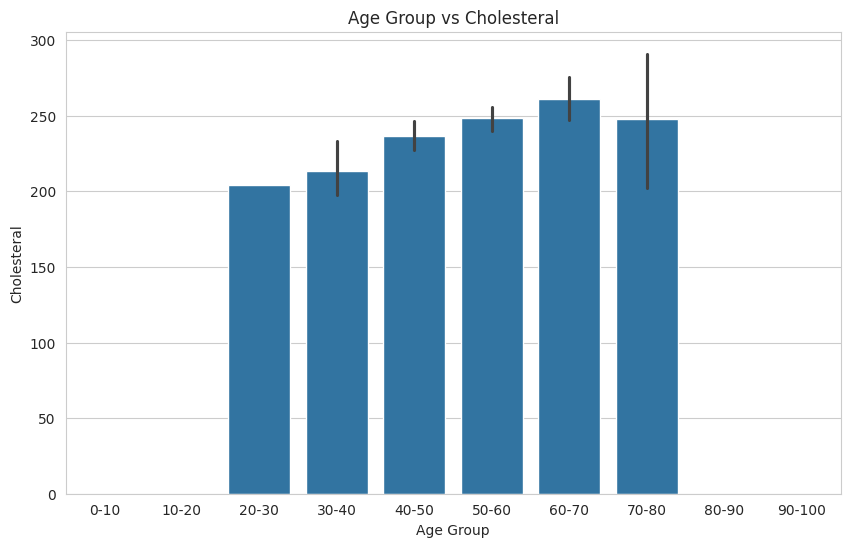

In [171]:
# plotting Age Group vs Cholesteral
df["Age_group"] = pd.cut(df["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                        labels = ["0-10", "10-20", "20-30", "30-40", "40-50",'50-60','60-70', '70-80', '80-90','90-100'])
plt.figure(figsize=(10,6))
sns.barplot(x = 'Age_group', y = 'cholesteral', data=df)
plt.xlabel('Age Group')
plt.ylabel('Cholesteral')
plt.title('Age Group vs Cholesteral')
plt.show()


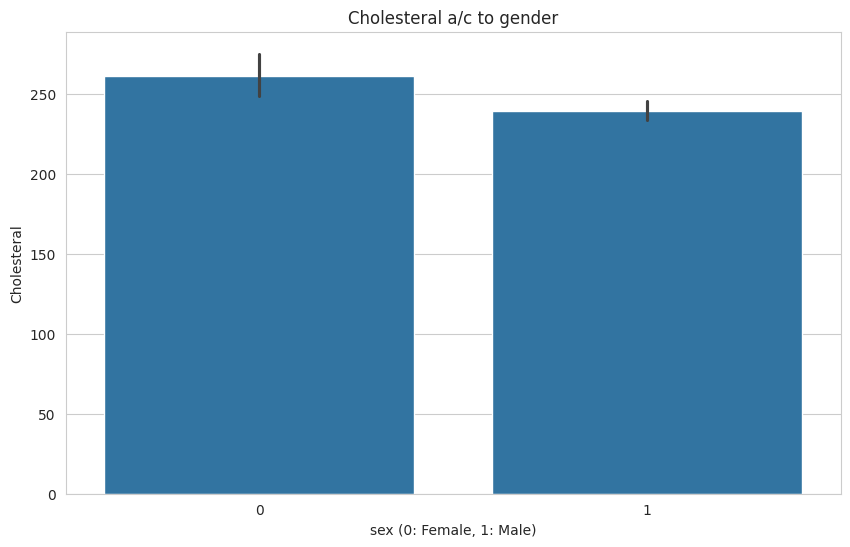

In [172]:
# Plot Cholesteral by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='cholesteral', data=df)
plt.title('Cholesteral a/c to gender')
plt.xlabel('sex (0: Female, 1: Male)')
plt.ylabel('Cholesteral')
plt.show()

In [173]:
df.head()

,age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_of_vessels_colored,thal,class,Age_group
0,63.0,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,2,1,60-70
1,67.0,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,1,0,60-70
2,67.0,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,3,0,60-70
3,37.0,1,3,130.0,250.0,0,1,187.0,0,3.5,3,0.0,1,1,30-40
4,41.0,0,2,130.0,204.0,0,3,172.0,0,1.4,1,0.0,1,1,40-50


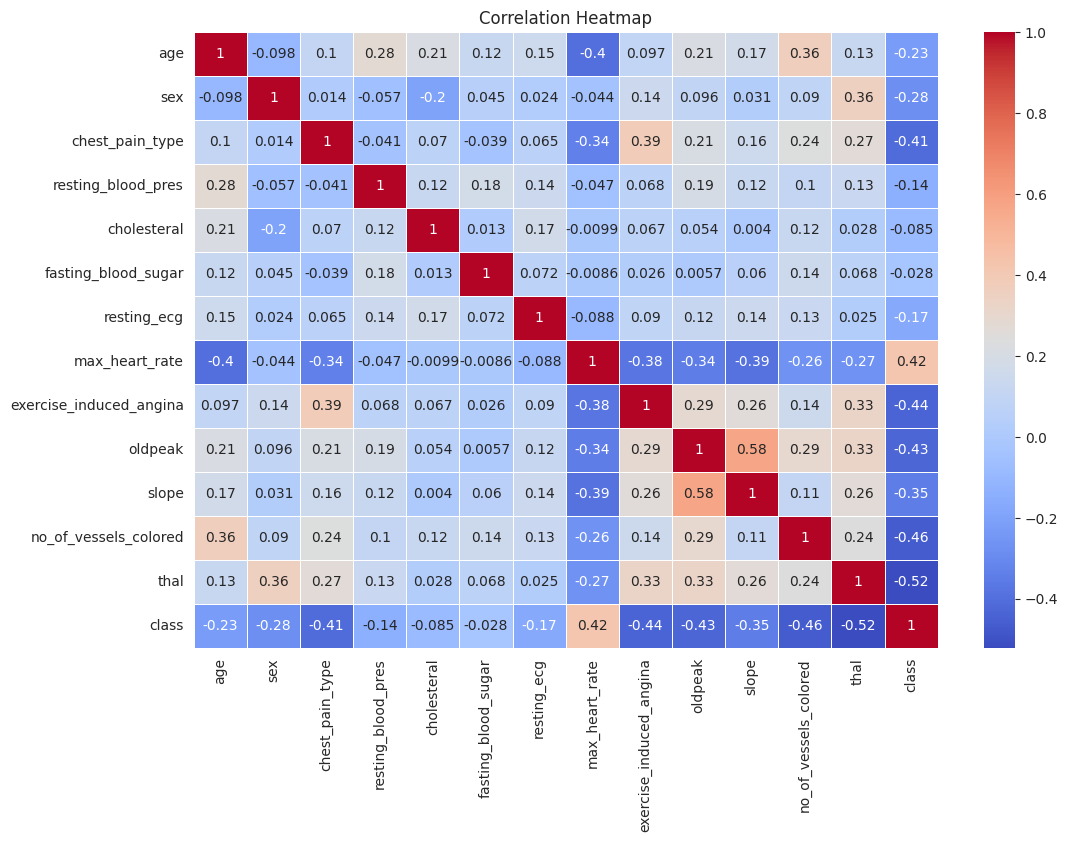

In [174]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
a = df.drop(columns=['Age_group'], axis=1)
corr_matrix = a.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

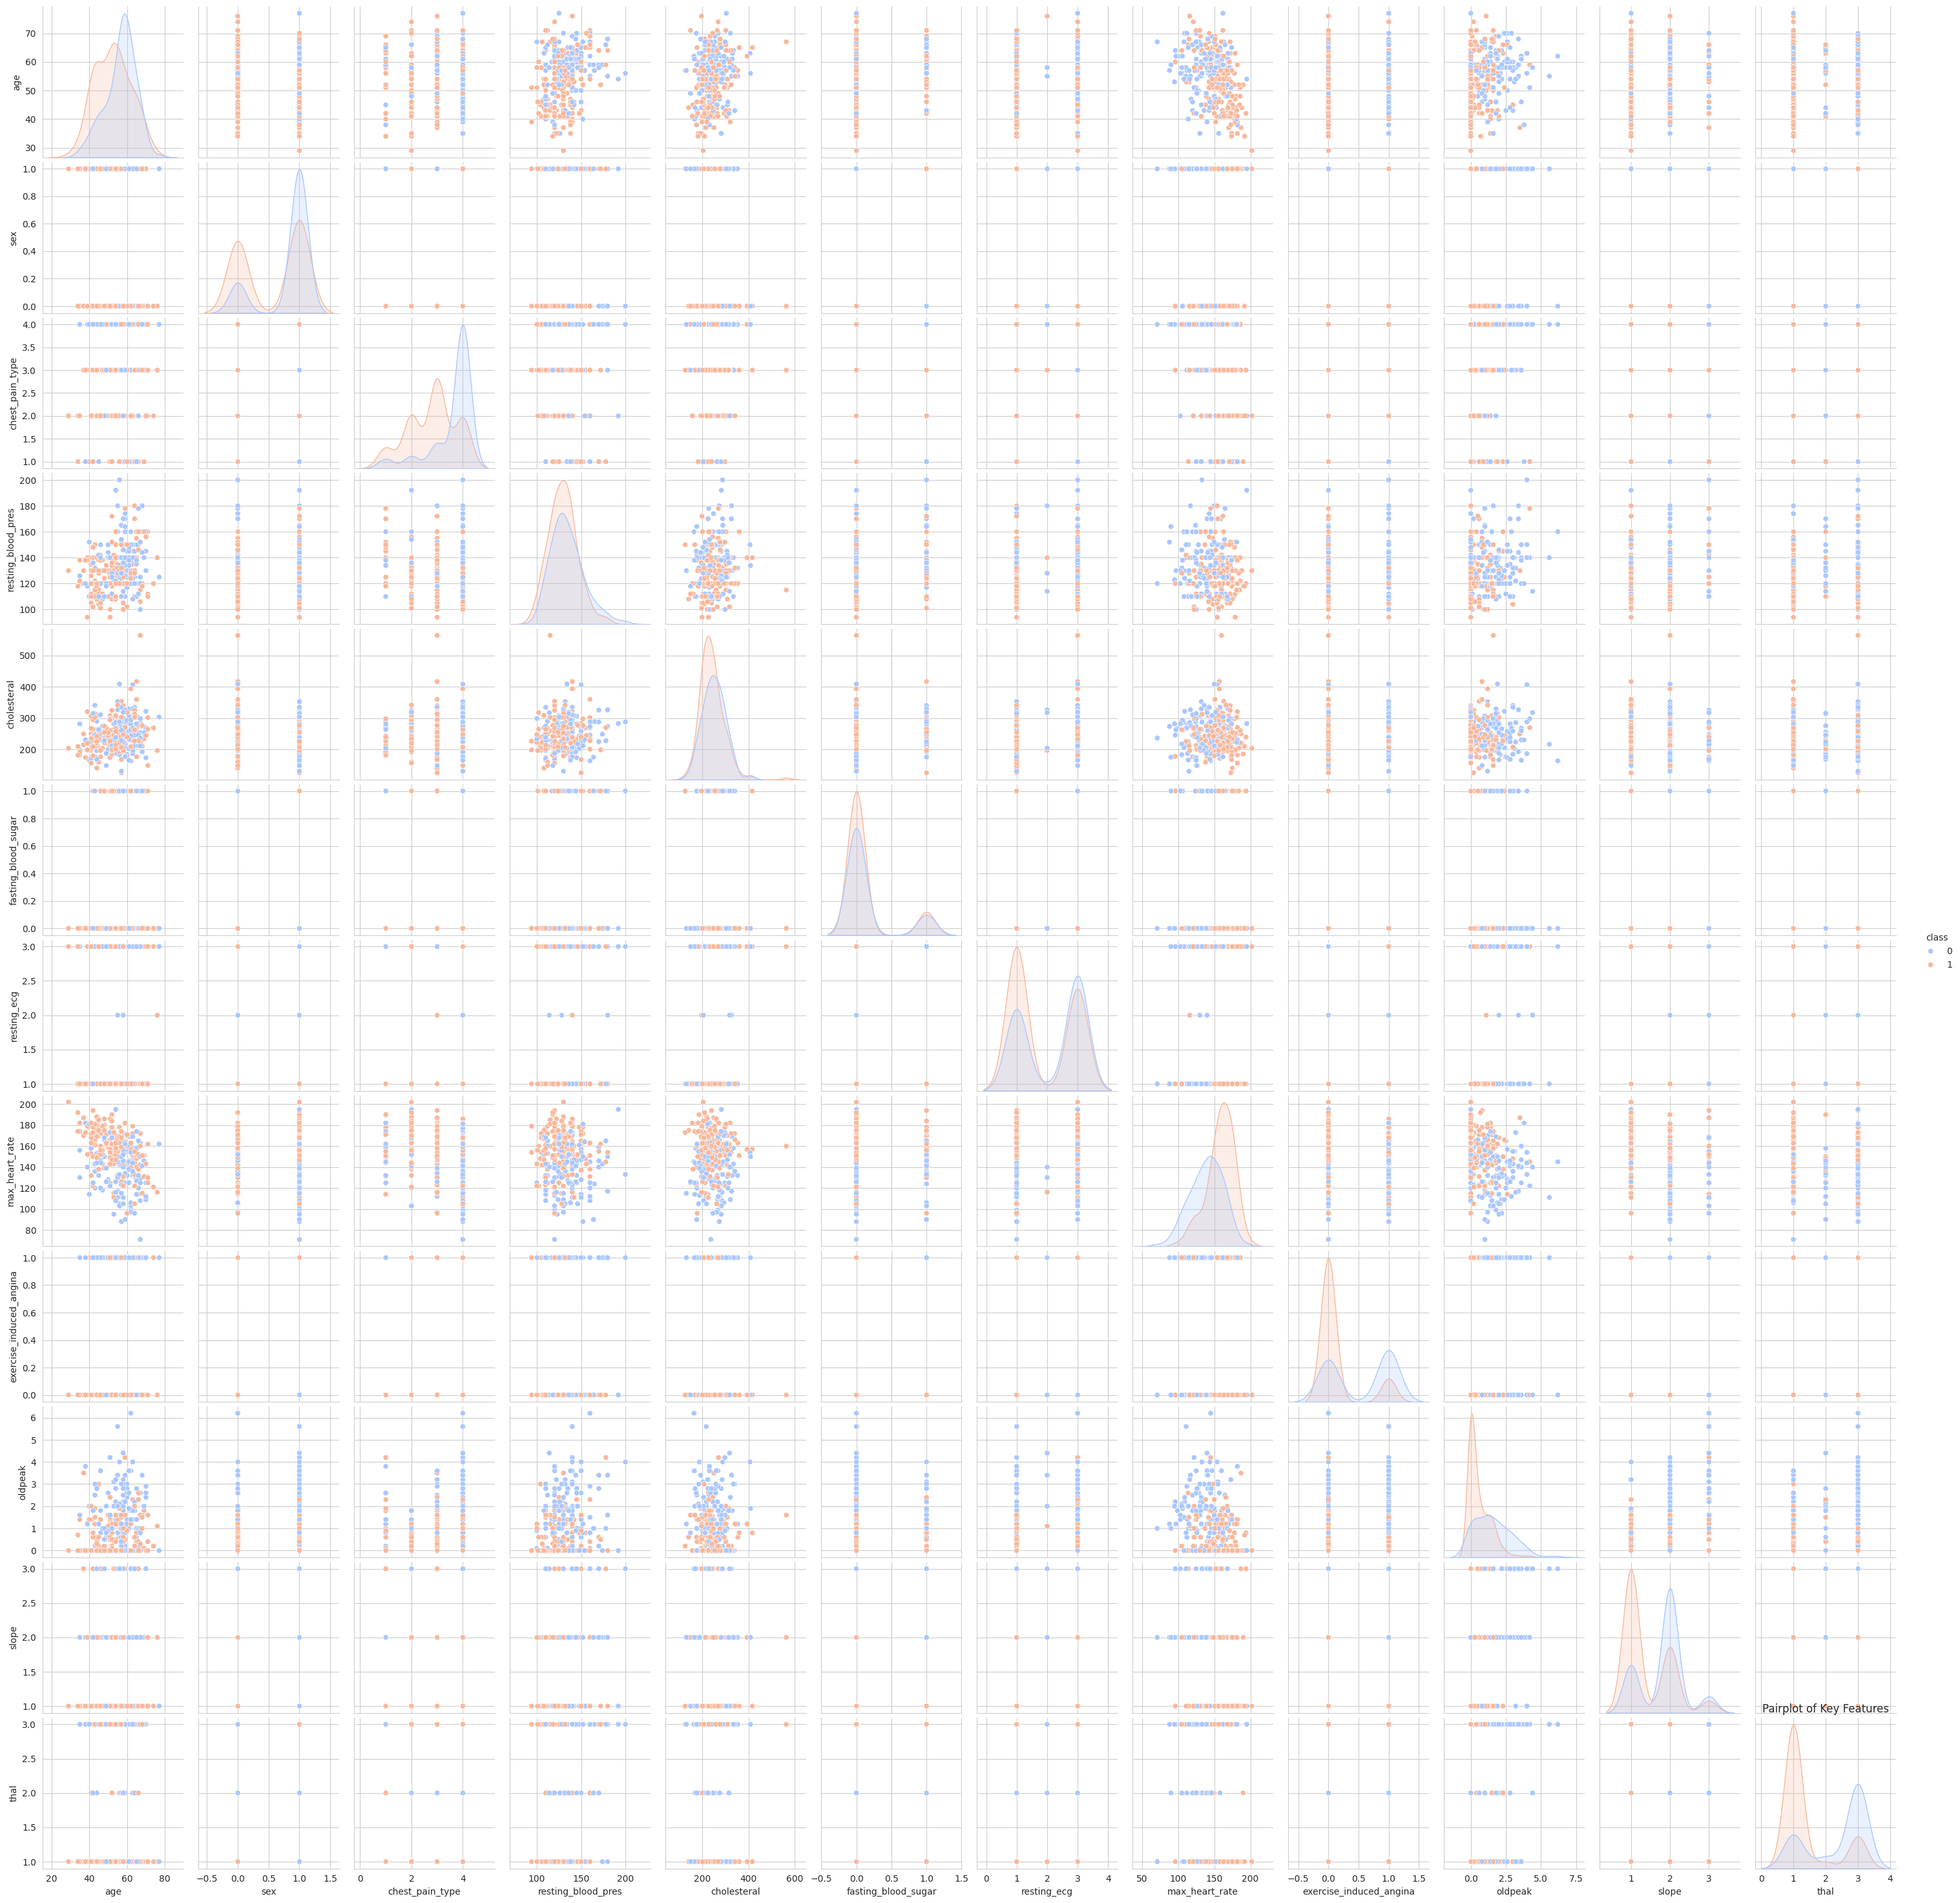

In [175]:
# Pairplot of Key Features
sns.pairplot(df[ ['age', 'sex', 'chest_pain_type','resting_blood_pres','cholesteral','fasting_blood_sugar','resting_ecg','max_heart_rate','exercise_induced_angina', 'oldpeak', 'slope','no_of_vessels_colored','thal', 'class']],
hue='class', palette='coolwarm')
plt.title('Pairplot of Key Features')
plt.show()

Data Normalization


In [176]:
# importing modules for data normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [177]:
# select features and target
df.head()
X = df.drop(columns=['class', 'Age_group'], axis = 1)
y = df['class']


In [178]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((61, 13), (61,))

In [179]:
# Normalize Data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

Perform Classification

In [183]:
# import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Random Forest Classifier

In [184]:
# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_normalized, y_train)

# predict on test set
y_pred = model.predict(X_test_normalized)

# Evaluat the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.75      0.89      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



<Figure size 1000x700 with 0 Axes>

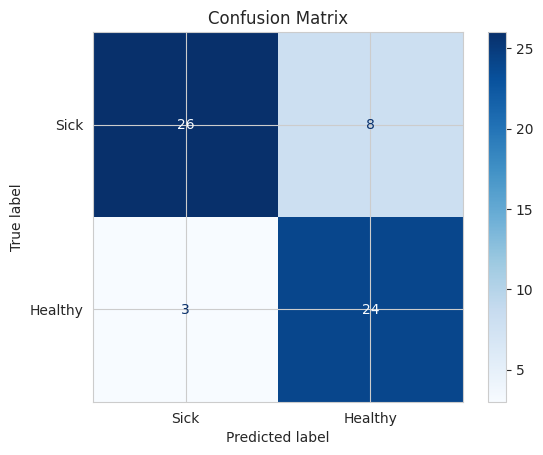

In [185]:
# compute confusion matrix# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Sick',
'Healthy'])
# Plot confusion matrix
plt.figure(figsize=(10, 7))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()